<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자동차 연비 예측 모델 개발

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


## 결측치가 있는 row를 확인해서 결측치와 대조되는 컬럼의 데이터를 확인

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

<Axes: >

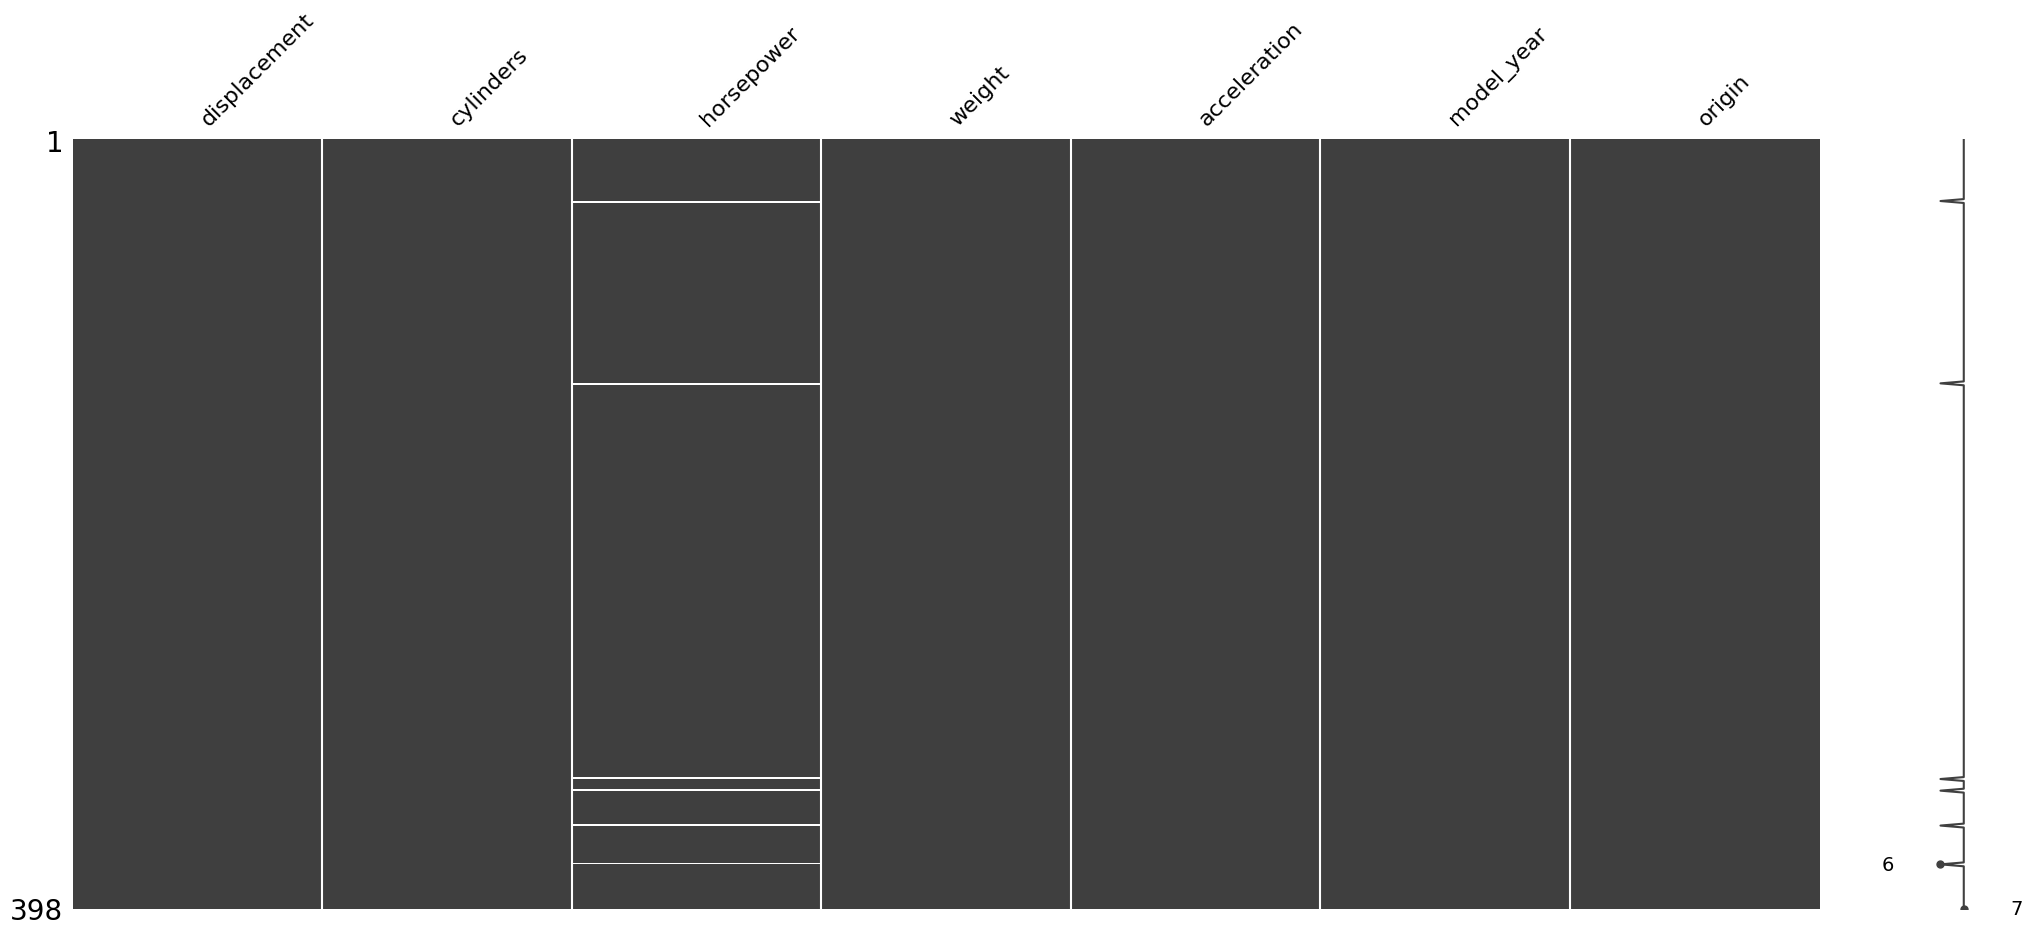

In [ ]:
msno.matrix(X)

In [ ]:
X.isna().head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [ ]:
X[X['cylinders'] ==8]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
291,267.0,8,125.0,3605,15.0,79,1
292,360.0,8,150.0,3940,13.0,79,1
298,350.0,8,125.0,3900,17.4,79,1
300,260.0,8,90.0,3420,22.2,79,1


In [ ]:
X[X.isna().any(axis=1) == True]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
32,98.0,4,NaN,2046,19.0,71,1
126,200.0,6,NaN,2875,17.0,74,1
330,85.0,4,NaN,1835,17.3,80,2
336,140.0,4,NaN,2905,14.3,80,1
354,100.0,4,NaN,2320,15.8,81,2
374,151.0,4,NaN,3035,20.5,82,1


In [ ]:
X.groupby('cylinders').mean()

,displacement,horsepower,weight,acceleration,model_year,origin
cylinders,,,,,,
3,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,109.796569,78.281407,2308.127451,16.601471,77.073529,1.985294
5,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,218.142857,101.506024,3198.226190,16.263095,75.928571,1.190476
8,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


In [ ]:
# 1. 결측치를 제거한다.
# X.dropna(inplace=True)
# 2. 결측치를 채운다.(평균)
# X.fillna(X.mean(), inplace=True)
# 3. cylinders 별로 평균을 구해서 채운다
# X.fillna(X.groupby('cylinders').mean(), inplace=True)
X['horsepower'] = X['horsepower'].fillna(X.groupby('cylinders')['horsepower'].transform('mean'))  ## groupby 와 transform은 같이 쓰인다, 그룹으로 묶어서 계산을 하고자 할때 사용
# X['horsepower'] = X['horsepower'].fillna(X['horsepower'].mean())   ## 전체평균

# 전체평균
# rmse : 2.862770005444669, r2 : 0.8475731044779455


# 실린더별 평균
# rmse : 2.8624170856130307, r2 : 0.8476106842753683



<ipython-input-246-18355b4acaec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'] = X['horsepower'].fillna(X.groupby('cylinders')['horsepower'].transform('mean'))  ## groupby 와 transform은 같이 쓰인다, 그룹으로 묶어서 계산을 하고자 할때 사용


In [ ]:
X.isna().sum()

,0
displacement,0
cylinders,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0


In [ ]:
X[X.isna().any(axis=1) == True]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [ ]:
X.iloc[[32, 126, 330, 336, 354, 374], X.columns.get_loc('horsepower')]

,horsepower
32,78.281407
126,101.506024
330,78.281407
336,78.281407
354,78.281407
374,78.281407


In [ ]:
# 모델개발에 필요한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# X(학습용), y(정답) 데이터 분할 되어있고
# 데이터를 학습용과 테스트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 7), (80, 7), (318, 1), (80, 1))

In [ ]:
# 모델 만들고 학습하고 평가하고.. 그리고 예측
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred =lr.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 2.8624170856130307, r2 : 0.8476106842753683


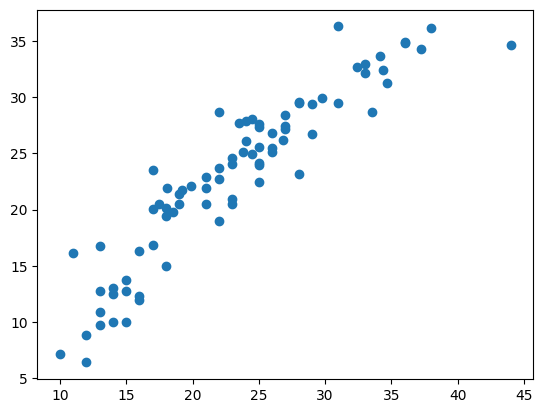

In [ ]:
plt.scatter(y_test, lr.predict(X_test))


# 회귀계수(coef_) 와 절편(intercept_)

In [ ]:
print(f'회귀계수 : {lr.coef_}', f'절편 : {lr.intercept_}')

회귀계수 : [[ 0.01447742 -0.15894993 -0.01477231 -0.00671369  0.06174992  0.79306806
   1.33551873]] 절편 : [-20.3002024]


In [ ]:
import pandas as pd
pd.DataFrame(lr.coef_, columns=X.columns)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,0.014477,-0.15895,-0.014772,-0.006714,0.06175,0.793068,1.335519


In [ ]:
pd.Series(lr.coef_[0], index=X.columns, name='coef').sort_values(ascending=False)

,coef
origin,1.335519
model_year,0.793068
acceleration,0.061750
displacement,0.014477
weight,-0.006714
horsepower,-0.014772
cylinders,-0.158950


1. origin:
  자동차의 제조국을 나타냅니다.
값은 주로 1, 2, 3으로 구분되며, 각각 북미, 유럽, 일본을 나타냅니다.

2. model_year:
  자동차의 제조 연도를 나타냅니다.
예를 들어, 70은 1970년, 75는 1975년을 의미합니다.

3. acceleration:
  자동차의 가속 성능을 나타냅니다.
보통 0에서 60마일(또는 0에서 100km)까지 도달하는 데 걸리는 시간을 초 단위로 측정합니다.
값이 낮을수록 빠른 가속을 의미합니다.
  
4. displacement:
  엔진의 배기량을 나타냅니다.
보통 입방 인치(cubic inches)나 리터 단위로 측정합니다.
배기량이 클수록 일반적으로 더 강한 엔진 성능을 나타냅니다.

5. weight:
  자동차의 중량을 나타냅니다.
보통 파운드(pounds) 단위로 측정합니다.
중량이 크면 연비가 낮고, 가속 성능이 떨어질 수 있습니다.

6. horsepower:
  엔진의 출력(마력)을 나타냅니다.
높은 마력은 더 강한 엔진 성능과 높은 속도를 의미합니다.

7. cylinders:
  엔진의 실린더 개수를 나타냅니다.
일반적으로 4, 6, 8 등의 값을 가집니다.
실린더 개수가 많을수록 엔진 성능이 좋지만, 연비는 떨어질 수 있습니다.

# 각 변수와 정답간의 선형성을 시각화 sns.regplot을 이용

<ipython-input-262-db0cea2790a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg'] = y


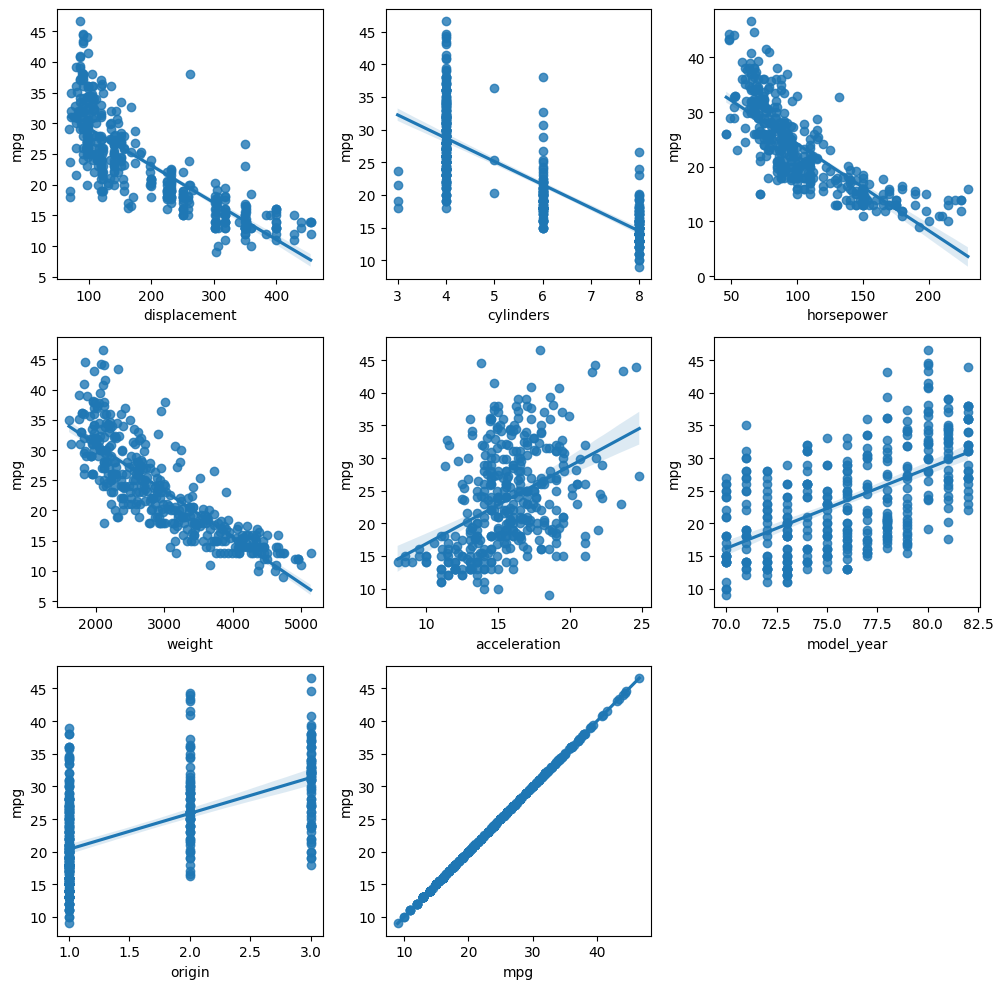

In [ ]:
# 3 X 3
import matplotlib.pyplot as plt
import seaborn as sns

# sns 데이터프레임으로 처리한다.
X['mpg'] = y
plt.figure(figsize=(10, 10))

for idx, col in enumerate(X.columns):
    plt.subplot(3, 3, idx+1)
    sns.regplot(x=col, y='mpg', data = X)

plt.tight_layout()
plt.show()

### subplot
  subplot 함수는 단일 플롯을 여러 개의 서브플롯으로 나눌 때 사용됩니다. 각각의 서브플롯을 개별적으로 생성하고 설정해야 합니다.

  - 사용법: plt.subplot(nrows, ncols, index)
  - nrows: 서브플롯의 행 수
  - ncols: 서브플롯의 열 수
  - index: 현재 플롯의 위치 (1부터 시작)

### subplots
  subplots 함수는 한 번의 호출로 여러 서브플롯을 생성하고, 이를 배열 형태로 반환합니다. 이 배열을 사용하여 각 서브플롯을 쉽게 접근하고 설정할 수 있습니다.

  - 사용법: fig, axes = plt.subplots(nrows, ncols, figsize)
  - nrows: 서브플롯의 행 수
  - ncols: 서브플롯의 열 수
  - figsize: 전체 플롯의 크기
  - fig: 전체 플롯 객체
  - axes: 서브플롯의 배열


### 주요 차이점
  - 설정 방식:
    - subplot: 각 서브플롯을 개별적으로 설정합니다.
    - subplots: 한 번에 여러 서브플롯을 생성하고 배열을 통해 접근합니다.

  - 사용 편의성:
    - subplot: 개별 설정이 필요한 경우 유용합니다.
    - subplots: 배열로 서브플롯을 관리할 수 있어, 반복문을 통해 쉽게 설정할 수 있습니다.

  - 코드 간결성:
    - subplots는 배열을 사용하여 코드를 더 간결하고 이해하기 쉽게 만듭니다.

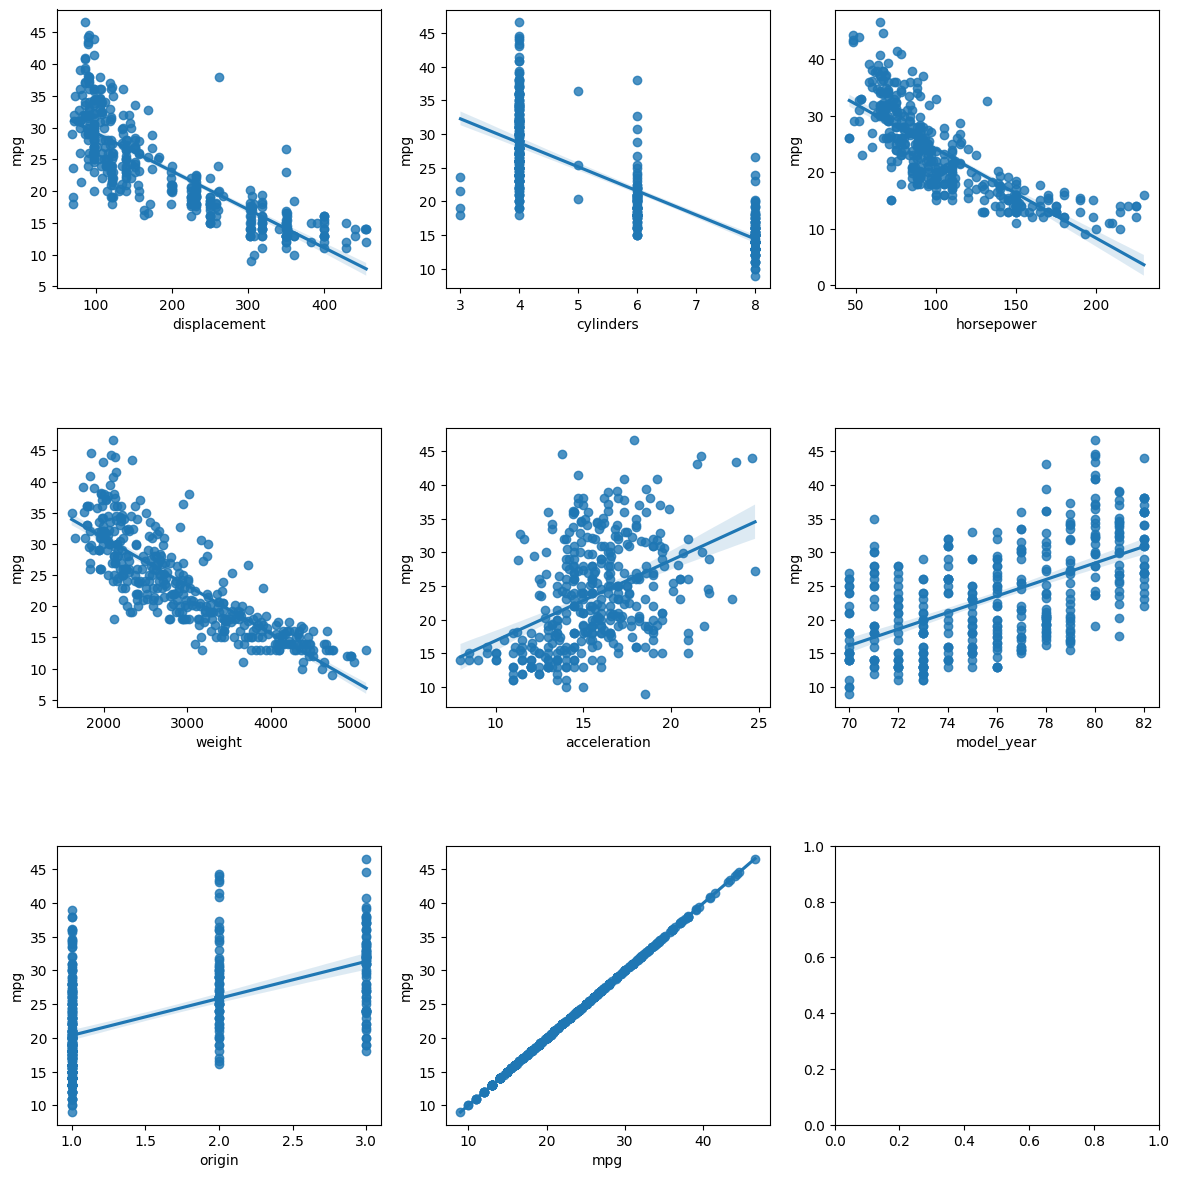

In [ ]:
## subpolts 의 예시
fig, axs = plt.subplots(figsize = (12,12), nrows= 3 , ncols=3)
plt.tight_layout(pad=2.0)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, feature in enumerate(X.columns):
  row = int(i/3)
  col = i%3
  sns.regplot(x=feature, y = 'mpg', data = X, ax=axs[row][i%3])
plt.show()

## 모델 재 설계
  - 계수가 높은 데이터
  - 선형 모델에 맞게 상관계수가 높은 데이터

In [ ]:
corr = X.corr()
corr

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
displacement,1.000000,0.950721,0.897520,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
cylinders,0.950721,1.000000,0.843794,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
horsepower,0.897520,0.843794,1.000000,0.863600,-0.688022,-0.416841,-0.450352,-0.775608
weight,0.932824,0.896017,0.863600,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.543684,-0.505419,-0.688022,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.370164,-0.348746,-0.416841,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.609409,-0.562543,-0.450352,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.804203,-0.775396,-0.775608,-0.831741,0.420289,0.579267,0.563450,1.000000


In [ ]:
# 1. origin, model_year
# 2. weight, displacement, horsepower

In [ ]:
X1 = X[['origin', 'model_year']]
X2 = X[['weight', 'displacement', 'horsepower']]

In [ ]:
X1 , X2

(     origin  model_year
 0         1          70
 1         1          70
 2         1          70
 3         1          70
 4         1          70
 ..      ...         ...
 393       1          82
 394       2          82
 395       1          82
 396       1          82
 397       1          82
 
 [398 rows x 2 columns],
      weight  displacement  horsepower
 0      3504         307.0       130.0
 1      3693         350.0       165.0
 2      3436         318.0       150.0
 3      3433         304.0       150.0
 4      3449         302.0       140.0
 ..      ...           ...         ...
 393    2790         140.0        86.0
 394    2130          97.0        52.0
 395    2295         135.0        84.0
 396    2625         120.0        79.0
 397    2720         119.0        82.0
 
 [398 rows x 3 columns])

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [ ]:
X1.info() , X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   origin      398 non-null    int64
 1   model_year  398 non-null    int64
dtypes: int64(2)
memory usage: 6.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


(None, None)

In [ ]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
y_pred1 = lr.predict(X1_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y1_test, y_pred1))
r2 = r2_score(y1_test, y_pred1)

In [ ]:
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 4.881866268630342, r2 : 0.5567380581165788


In [ ]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y_pred2 = lr.predict(X2_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y2_test, y_pred2))
r2 = r2_score(y2_test, y_pred2)

In [ ]:
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 3.8387724643302525, r2 : 0.7259224712458288


In [ ]:
# 사용자가 데이터를 입력해서 연비를 예측
X_test

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
198,91.0,4,53.0,1795,17.4,76,3
396,120.0,4,79.0,2625,18.6,82,1
33,232.0,6,100.0,2634,13.0,71,1
208,318.0,8,150.0,3940,13.2,76,1
93,318.0,8,150.0,4237,14.5,73,1
...,...,...,...,...,...,...,...
249,260.0,8,110.0,3365,15.5,78,1
225,250.0,6,110.0,3520,16.4,77,1
367,112.0,4,88.0,2605,19.6,82,1
175,90.0,4,70.0,1937,14.0,75,2


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
user_data = [100, 8 ,130, 2500, 16.2, 80, 1 ]
lr.predict([user_data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[26.95263967]])

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [ ]:
X.info() , y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

(None, None)

In [ ]:
X.head(), y.head()

(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
 0    yes       no        no       4         3     4    1    1      3        4  
 1    yes      yes        no       5         3     3    1    1      3        2  
 2    yes      yes        no       4         3     2    2    3      3        6  
 3    yes      yes       yes       3         2     2    1    1      5        0  
 4    yes       no        no       4         3     2    1    2      5        0  
 
 [5 rows x 30 colu

In [ ]:
np.mean(y, axis=1)

,0
0,7.333333
1,10.333333
2,12.333333
3,14.000000
4,12.333333
...,...
644,10.333333
645,15.333333
646,10.666667
647,10.000000


In [ ]:
# 학생의 성적인 G1, G2, G3 성적을 예측하는 모델을 3개 만들어서 사용 -> 정석
# 다중선형 타겟 모델


In [ ]:
# 1. 데이터 확인(결측치) - 처리 - 데이터 분리 - 모델 선정 - 학습 - 예측 - 평가 ,g1,g2, g3

In [ ]:
X.describe(include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649,649,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,580,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,NaN,NaN,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,NaN,NaN,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000


In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [ ]:
X.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [ ]:
X['school'].unique()

array(['GP', 'MS'], dtype=object)

In [ ]:
X.loc[X['school'] == 'GP', 'school'] = 0
X.loc[X['school'] == 'MS', 'school'] = 1


In [ ]:
X['school'].unique()

array([0, 1], dtype=object)

In [ ]:
X['sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
X.loc[X['sex'] == 'F', 'sex'] = 0
X.loc[X['sex'] == 'M', 'sex'] = 1

In [ ]:
X['sex'].unique()

array([0, 1], dtype=object)

In [ ]:
X['address'].unique()

array(['U', 'R'], dtype=object)

In [ ]:
X.loc[X['address'] == 'U', 'address'] = 0
X.loc[X['address'] == 'R', 'address'] = 1

In [ ]:
X['address'].unique()

array([0, 1], dtype=object)

In [ ]:
X['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

In [ ]:
X.loc[X['famsize'] == 'GT3', 'famsize'] = 0
X.loc[X['famsize'] == 'LE3', 'famsize'] = 1

In [ ]:
X['famsize'].unique()

array([0, 1], dtype=object)

In [ ]:
X['Pstatus'].unique()

array(['A', 'T'], dtype=object)

In [ ]:
X.loc[X['Pstatus'] == 'A', 'Pstatus'] = 0
X.loc[X['Pstatus'] == 'T', 'Pstatus'] = 1

In [ ]:
X['Pstatus'].unique()

array([0, 1], dtype=object)

In [ ]:
X['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [ ]:
X.loc[X['Mjob'] == 'at_home', 'Mjob'] = 0
X.loc[X['Mjob'] == 'health', 'Mjob'] = 1
X.loc[X['Mjob'] == 'other', 'Mjob'] = 2
X.loc[X['Mjob'] == 'services', 'Mjob'] = 3
X.loc[X['Mjob'] == 'teacher', 'Mjob'] = 4

In [ ]:
X['Mjob'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [ ]:
X['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [ ]:
X.loc[X['Fjob'] == 'teacher', 'Fjob'] = 0
X.loc[X['Fjob'] == 'other', 'Fjob'] = 1
X.loc[X['Fjob'] == 'services', 'Fjob'] = 2
X.loc[X['Fjob'] == 'health', 'Fjob'] = 3
X.loc[X['Fjob'] == 'at_home', 'Fjob'] = 4

In [ ]:
X['Fjob'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [ ]:
for col in X.columns:
  if X[col].dtype == 'object':
    print(f'{col} : {X[col].unique()}')
    if len(X[col].unique()) == 2:
      X.loc[X[col] == X[col].unique()[0], col] = 0
      X.loc[X[col] == X[col].unique()[1], col] = 1
      print(f'{col} : {X[col].unique()}')
    elif len(X[col].unique()) == 3:
      X.loc[X[col] == X[col].unique()[0], col] = 0
      X.loc[X[col] == X[col].unique()[1], col] = 1
      X.loc[X[col] == X[col].unique()[2], col] = 2
      print(f'{col} : {X[col].unique()}')
    elif len(X[col].unique()) == 4:
      X.loc[X[col] == X[col].unique()[0], col] = 0
      X.loc[X[col] == X[col].unique()[1], col] = 1
      X.loc[X[col] == X[col].unique()[2], col] = 2
      X.loc[X[col] == X[col].unique()[3], col] = 3
      print(f'{col} : {X[col].unique()}')
    elif len(X[col].unique()) == 5:
      X.loc[X[col] == X[col].unique()[0], col] = 0
      X.loc[X[col] == X[col].unique()[1], col] = 1
      X.loc[X[col] == X[col].unique()[2], col] = 2
      X.loc[X[col] == X[col].unique()[3], col] = 3
      X.loc[X[col] == X[col].unique()[4], col] = 4
      print(f'{col} : {X[col].unique()}')

school : ['GP' 'MS']
school : [0 1]
sex : ['F' 'M']
sex : [0 1]
address : ['U' 'R']
address : [0 1]
famsize : ['GT3' 'LE3']
famsize : [0 1]
Pstatus : ['A' 'T']
Pstatus : [0 1]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Mjob : [0 1 2 3 4]
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
Fjob : [0 1 2 3 4]
reason : ['course' 'other' 'home' 'reputation']
reason : [0 1 2 3]
guardian : ['mother' 'father' 'other']
guardian : [0 1 2]
schoolsup : ['yes' 'no']
schoolsup : [0 1]
famsup : ['no' 'yes']
famsup : [0 1]
paid : ['no' 'yes']
paid : [0 1]
activities : ['no' 'yes']
activities : [0 1]
nursery : ['yes' 'no']
nursery : [0 1]
higher : ['yes' 'no']
higher : [0 1]
internet : ['no' 'yes']
internet : [0 1]
romantic : ['no' 'yes']
romantic : [0 1]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
X.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,0,0,0,0,1,2,1,0,0,1,1,0,0,0,0,1,0
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [ ]:
for col in X.columns:
  if X[col].dtype == 'object':
    print(f'{col} : {X[col].unique()}')
    X[col] = X[col].astype('float')

school : [0 1]
sex : [0 1]
address : [0 1]
famsize : [0 1]
Pstatus : [0 1]
Mjob : [0 1 2 3 4]
Fjob : [0 1 2 3 4]
reason : [0 1 2 3]
guardian : [0 1 2]
schoolsup : [0 1]
famsup : [0 1]
paid : [0 1]
activities : [0 1]
nursery : [0 1]
higher : [0 1]
internet : [0 1]
romantic : [0 1]


<ipython-input-348-2d5a2ae745ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('float')
<ipython-input-348-2d5a2ae745ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('float')
<ipython-input-348-2d5a2ae745ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    float64
 1   sex         649 non-null    float64
 2   age         649 non-null    int64  
 3   address     649 non-null    float64
 4   famsize     649 non-null    float64
 5   Pstatus     649 non-null    float64
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    float64
 9   Fjob        649 non-null    float64
 10  reason      649 non-null    float64
 11  guardian    649 non-null    float64
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    float64
 16  famsup      649 non-null    float64
 17  paid        649 non-null    float64
 18  activities  649 non-null    float64
 19  nursery     649 non-null    f

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


In [ ]:
y1 = y['G1']
y2 = y['G2']
y3 = y['G3']

In [ ]:
X_train , X_test  = train_test_split(X, test_size=0.2, random_state=42)
y1_train , y1_test = train_test_split(y1, test_size=0.2, random_state=42)
y2_train , y2_test = train_test_split(y2, test_size=0.2, random_state=42)
y3_train , y3_test = train_test_split(y3, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape

((519, 30), (130, 30), (519,), (130,))

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_train, y1_train)

LinearRegression()

In [ ]:
rmse = np.sqrt(mean_squared_error(y1_test, lr.predict(X_test)))
r2 = r2_score(y1_test, lr.predict(X_test))


In [ ]:
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 2.6911746336427504, r2 : 0.15634881887178753


In [ ]:
print(f'coef : {lr1.coef_}, intercept : {lr1.intercept_}')

coef : [-1.18915343 -0.35578609 -0.10414079 -0.16621695  0.14086547  0.06456707
  0.10264843  0.14502153  0.08879236 -0.07640559  0.09864049  0.28859087
 -0.08359373  0.33977389 -1.0023882   1.65788202 -0.16158662 -0.50471899
  0.23588843  0.05595418 -1.74818379  0.10187424 -0.1301867   0.0922699
  0.06534026 -0.06127615 -0.22104494 -0.04793342 -0.10268676 -0.0663416 ], intercept : 11.733372776613924


In [ ]:
pd.Series(lr1.coef_, index=X.columns, name='coef').sort_values(ascending=False)

,coef
schoolsup,1.657882
studytime,0.339774
guardian,0.288591
activities,0.235888
Fedu,0.145022
famsize,0.140865
Medu,0.102648
internet,0.101874
reason,0.098640
famrel,0.092270


In [ ]:
import statsmodels.api as sm  ## OLS 분석을 보고 싶으면 statsmodels 을 따로 사용해야 된다.
## sklearn 에서 수행한 결과와 동일

x = sm.add_constant(X_train)
model = sm.OLS(y1_train,x)
result = model.fit()
print(result.summary())

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print("\nVIF 데이터:\n", vif_data)

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     10.64
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           5.46e-37
Time:                        12:43:04   Log-Likelihood:                -1116.2
No. Observations:                 519   AIC:                             2294.
Df Residuals:                     488   BIC:                             2426.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7334      1.614      7.272      0.0

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train, y2_train)

LinearRegression()

In [ ]:
rmse = np.sqrt(mean_squared_error(y2_test, lr.predict(X_test)))
r2 = r2_score(y2_test, lr.predict(X_test))


In [ ]:
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 2.7781417854401753, r2 : 0.1424139156707117


In [ ]:
print(f'coef : {lr2.coef_}, intercept : {lr2.intercept_}')

coef : [-1.09576181e+00 -3.70416651e-01  1.42183888e-01 -1.30030877e-01
  1.26381292e-01 -1.91969607e-01  1.96999795e-01  1.84929526e-01
 -1.87629369e-04 -8.20344823e-02  1.15755693e-01  3.00461412e-01
 -1.48908791e-01  2.83514541e-01 -1.27956394e+00  1.37465235e+00
 -9.85274280e-02 -1.84921992e-01  2.33317096e-01  4.30038198e-02
 -1.59892329e+00  2.01897328e-01 -4.61442589e-01  1.90464966e-01
 -2.90681487e-03 -1.59474702e-01 -2.47035029e-01 -3.66665877e-02
 -1.72309067e-01 -5.94115085e-02], intercept : 8.714903242738673


In [ ]:
pd.Series(lr2.coef_, index=X.columns, name='coef').sort_values(ascending=False)

,coef
schoolsup,1.374652
guardian,0.300461
studytime,0.283515
activities,0.233317
internet,0.201897
Medu,0.197000
famrel,0.190465
Fedu,0.184930
age,0.142184
famsize,0.126381


In [ ]:
import statsmodels.api as sm  ## OLS 분석을 보고 싶으면 statsmodels 을 따로 사용해야 된다.
## sklearn 에서 수행한 결과와 동일

x = sm.add_constant(X_train)
model = sm.OLS(y2_train,x)
result = model.fit()
print(result.summary())

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print("\nVIF 데이터:\n", vif_data)

                            OLS Regression Results                            
Dep. Variable:                     G2   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9.730
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.13e-33
Time:                        12:42:51   Log-Likelihood:                -1163.4
No. Observations:                 519   AIC:                             2389.
Df Residuals:                     488   BIC:                             2521.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7149      1.767      4.931      0.0

In [ ]:
lr3 = LinearRegression()
lr3.fit(X_train, y3_train)

LinearRegression()

In [ ]:
rmse = np.sqrt(mean_squared_error(y3_test, lr.predict(X_test)))
r2 = r2_score(y3_test, lr.predict(X_test))

In [ ]:
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 2.875217679203226, r2 : 0.15226440937497254


In [ ]:
print(f'coef : {lr3.coef_}, intercept : {lr3.intercept_}')

coef : [-1.54188107 -0.45746747  0.12242445 -0.23339784  0.26304181 -0.21790045
  0.09827838  0.20024684  0.04301427 -0.01004348  0.06023133  0.38517536
 -0.02081209  0.36685845 -1.44994715  1.63041224  0.05871742 -0.46872402
  0.22665024  0.10044817 -1.71877682  0.31251064 -0.36452967  0.11325589
 -0.07478787 -0.12443293 -0.35201251 -0.01807093 -0.20520434 -0.04913907], intercept : 9.524280528299105


In [ ]:
pd.Series(lr3.coef_, index=X.columns, name='coef').sort_values(ascending=False)

,coef
schoolsup,1.630412
guardian,0.385175
studytime,0.366858
internet,0.312511
famsize,0.263042
activities,0.226650
Fedu,0.200247
age,0.122424
famrel,0.113256
nursery,0.100448


In [ ]:
import statsmodels.api as sm  ## OLS 분석을 보고 싶으면 statsmodels 을 따로 사용해야 된다.
from statsmodels.stats.outliers_influence import variance_inflation_factor
## sklearn 에서 수행한 결과와 동일

x = sm.add_constant(X_train)
model = sm.OLS(y3_train,x)
result = model.fit()
print(result.summary())

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print("\nVIF 데이터:\n", vif_data)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     9.519
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           6.78e-33
Time:                        12:42:29   Log-Likelihood:                -1227.7
No. Observations:                 519   AIC:                             2517.
Df Residuals:                     488   BIC:                             2649.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5243      2.000      4.761      0.0

In [ ]:
# 다중 출력 회귀모델

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.head()

,G1,G2,G3
332,18,18,18
29,12,11,12
302,10,11,12
286,12,12,13
554,10,11,10


In [ ]:
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
# 예측 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'rmse : {rmse}, r2 : {r2}')

rmse : 2.7509488597325484, r2 : 0.1682961494052672


In [ ]:
y_pred[:3] , y_test[:3]

(array([[12.13660735, 12.89771252, 13.02659272],
        [12.01952738, 12.0976424 , 12.78128514],
        [12.77910331, 13.44588639, 13.49024163]]),
      G1  G2  G3
 636  17  18  19
 220  11  11  12
 594  18  18  18)

# R2 값이 낮은이유
  - 선형성이 부족
    - 선형관계가 없을때    --> 비선형 모델, 신경망
  - 중요한 피처 누락
    - 피처 엔지니어링
  - 다중 공선성
    - 독립변수들은 서로 독립적이어야 한다
    - 상관관계가 높은 피처를 제거, 통합하거나, 정규화 실시
  - 과적합
    - 모델이 너무 복잡하거나, 불필요한 피처를 포함시, 제약조건을 만들어서 과적합을 없애거나, early stopping 같은 과적합 방지 방법 사용
  - 데이터 품질
    - 노이즈, 결측치, 이상치

# 데이터를 더 선형적으로 만들어 보자
  - 피처변환
    - 로그변환 : 비선형적으로 증가하거나 감소할때, 특히 지수적으로 변환을 보일때

<Axes: xlabel='studytime', ylabel='G1'>

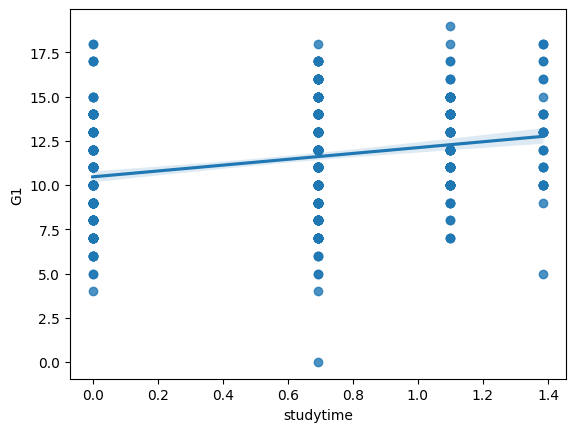

In [ ]:
# 로그 변환
np.log(X['studytime'])
sns.regplot(x=np.log(X['studytime']), y=y['G1'], data=X)

<Axes: xlabel='studytime', ylabel='G1'>

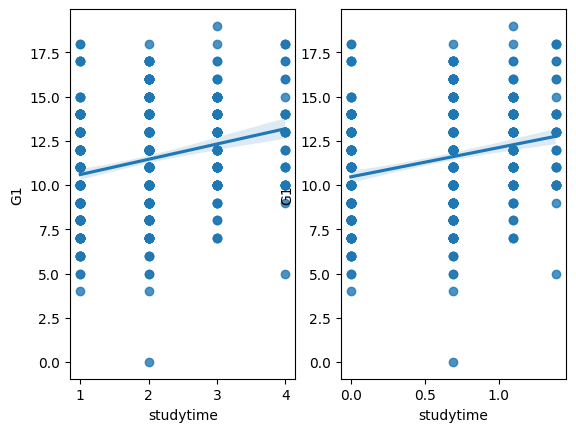

In [ ]:
plt.subplot(1,2,1)
sns.regplot(x=X['studytime'], y=y['G1'], data=X)
plt.subplot(1,2,2)
sns.regplot(x=np.log(X['studytime']), y=y['G1'], data=X)

<Axes: xlabel='absences', ylabel='G1'>

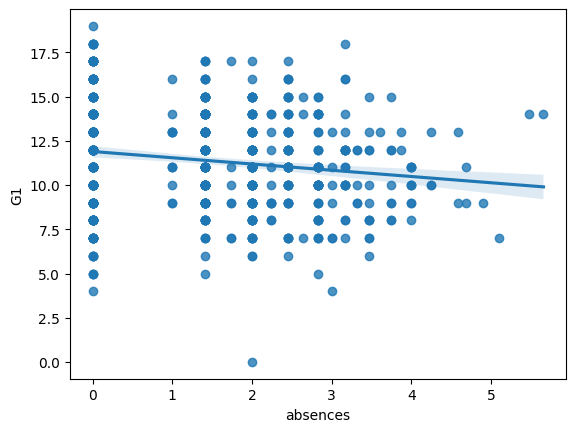

In [ ]:
# 제곱근 변환 : 데이터가 한쪽으로 치우쳐져 있을때
np.sqrt(X['absences'])
sns.regplot(x=np.sqrt(X['absences']), y=y['G1'], data=X)

<Axes: xlabel='absences', ylabel='G1'>

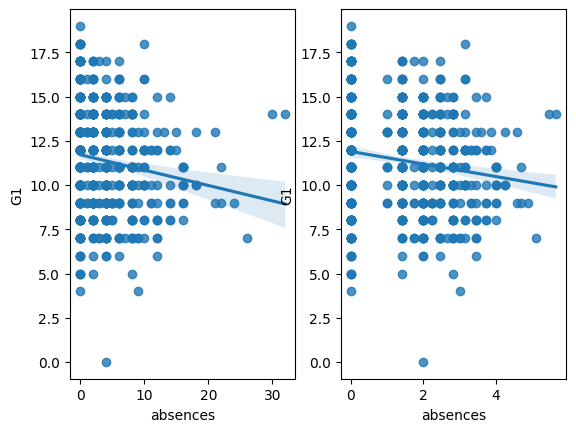

In [ ]:
# 효과 비교
plt.subplot(1,2,1)
sns.regplot(x=(X['absences']), y=y['G1'], data=X)
plt.subplot(1,2,2)
sns.regplot(x=np.sqrt(X['absences']), y=y['G1'], data=X)

In [ ]:
# 다항변환 : 제곱항을 추가
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
p.fit_transform(X[['absences']])

array([[ 1.,  4., 16.],
       [ 1.,  2.,  4.],
       [ 1.,  6., 36.],
       ...,
       [ 1.,  6., 36.],
       [ 1.,  6., 36.],
       [ 1.,  4., 16.]])

In [ ]:
X['absences']

,absences
0,4
1,2
2,6
3,0
4,0
...,...
644,4
645,4
646,6
647,6


In [ ]:
studytime_poly = p.fit_transform(X[['studytime']])
studytime_poly[:,1].shape , X['studytime'].shape

((649,), (649,))

In [ ]:
studytime_poly.shape

(649, 3)

<Axes: ylabel='G1'>

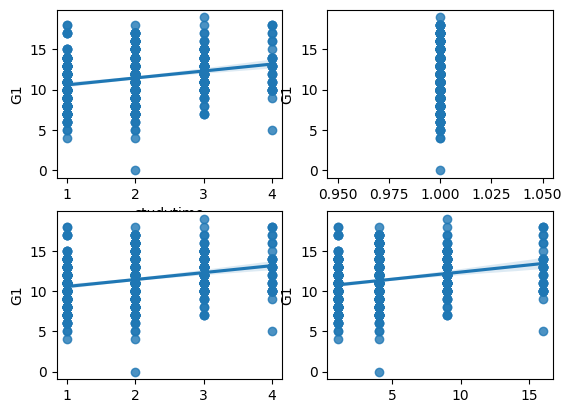

In [ ]:
plt.subplot(2,2,1)
sns.regplot(x=X['studytime'], y=y['G1'], data=X)
plt.subplot(2,2,2)
sns.regplot(x=studytime_poly[:,0], y=y['G1'], data=X)
plt.subplot(2,2,3)
sns.regplot(x=studytime_poly[:,1], y=y['G1'], data=X)
plt.subplot(2,2,4)
sns.regplot(x=studytime_poly[:,2], y=y['G1'], data=X)

In [ ]:
X_poly = PolynomialFeatures(degree = 2).fit_transform(X)
mr = MultiOutputRegressor(LinearRegression())
mr.fit(X_poly, y)
y_pred = mr.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f'rmse : {rmse}, r2 : {r2}')


rmse : 1.1718741032972062, r2 : 0.8434770337654774
